In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from PlottingFunctions import plot_inertia, plot_silhouette

In [1]:
%run extract_data.py

Your data is ready! Merged table name is zillow_full.


In [5]:
zillow_full = zillow_full.drop(['PersonalIncome', 'AQIMean', 'Vol_moderate_income', 'Vol_low_income'], axis=1)

In [9]:
# SF Metro
counties_sf = ['Alameda County', 'Contra Costa County', 'Marin County', 'Napa County', 'San Mateo County', 
            'Santa Clara County', 'Solano County', 'Sonoma County', 'San Francisco County']
# NY Metro:
counties_ny = ['New York County', 'Bronx County', 'Queens County', 'Kings County', 'Richmond County']
# Greater Austin Metro:
counties_au = ['Bastrop County', 'Caldwell County', 'Hays County', 'Travis County', 'Williamson County']
# Miami Metro:
counties_mi = ['Miami-Dade County', 'Broward County', 'Palm Beach County']

In [12]:
zillow = zillow_full[zillow_full['County'].isin(counties_sf+counties_ny+counties_au+counties_mi)].reset_index().drop('index', axis=1)
zillow.head()

,Zipcode,City,State,Metro,County,SizeRank,Date,Rent,Year,State-County,...,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2015-01-01,3566.0,2015,NY-New York County,...,0.145510,1.153877,2.214388,0.932888,0.088021,0.066820,0.084888,0.051420,30.096886,0.216281
1,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2015-01-01,3413.0,2015,NY-New York County,...,0.082199,1.231472,1.853056,0.955315,0.082397,0.044685,0.073276,0.039193,27.057535,0.262305
2,10002,New York,NY,New York-Newark-Jersey City,New York County,7,2015-01-01,3508.0,2015,NY-New York County,...,0.276575,1.065116,2.235927,0.929920,0.168466,0.070080,0.051605,0.018042,30.594358,0.172389
3,11226,New York,NY,New York-Newark-Jersey City,Kings County,11,2015-01-01,1876.0,2015,NY-Kings County,...,0.174138,1.097732,2.729889,0.928099,0.103083,0.071901,0.045075,0.010311,42.388151,0.127736
4,10467,New York,NY,New York-Newark-Jersey City,Bronx County,12,2015-01-01,1442.0,2015,NY-Bronx County,...,0.278866,1.048949,2.824023,0.874915,0.129880,0.125085,0.093202,0.008001,43.596975,0.086000


In [53]:
zillow_cluster = zillow.select_dtypes(exclude = ["object"])
# zillow_cluster = zillow_cluster[zillow_cluster['Year']==2020]
zillow_cluster = zillow_cluster.drop(['Date', 'SizeRank', 'Rent', 'Year'], axis=1)
zillow_cluster.head()

,total_pop,households,median_age,median_income,income_per_capita,gini_index,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
0,92805.0,41910.0,41.3,85930.0,72802.0,0.5968,0.145510,1.153877,2.214388,0.932888,0.088021,0.066820,0.084888,0.051420,30.096886,0.216281
1,62435.0,33693.0,43.3,130452.0,119276.0,0.5604,0.082199,1.231472,1.853056,0.955315,0.082397,0.044685,0.073276,0.039193,27.057535,0.262305
2,74993.0,33540.0,43.6,35859.0,32694.0,0.5838,0.276575,1.065116,2.235927,0.929920,0.168466,0.070080,0.051605,0.018042,30.594358,0.172389
3,100277.0,36733.0,34.7,52052.0,26057.0,0.4631,0.174138,1.097732,2.729889,0.928099,0.103083,0.071901,0.045075,0.010311,42.388151,0.127736
4,103732.0,36732.0,33.7,37015.0,19100.0,0.4810,0.278866,1.048949,2.824023,0.874915,0.129880,0.125085,0.093202,0.008001,43.596975,0.086000


In [54]:
zillow_cluster_norm = pd.DataFrame(normalize(zillow_cluster,axis=0),columns=zillow_cluster.columns)
zillow_cluster_norm

,total_pop,households,median_age,median_income,income_per_capita,gini_index,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
0,0.013494,0.016561,0.008120,0.008067,0.010806,0.009306,0.006148,0.007598,0.006048,0.007459,0.005775,0.007529,0.008591,0.005147,0.006753,0.008259
1,0.009078,0.013314,0.008513,0.012247,0.017704,0.008738,0.003473,0.008109,0.005061,0.007638,0.005406,0.005035,0.007416,0.003923,0.006071,0.010016
2,0.010904,0.013253,0.008572,0.003367,0.004853,0.009103,0.011685,0.007013,0.006107,0.007435,0.011053,0.007897,0.005223,0.001806,0.006865,0.006583
3,0.014580,0.014515,0.006822,0.004887,0.003868,0.007221,0.007357,0.007228,0.007456,0.007421,0.006763,0.008102,0.004562,0.001032,0.009512,0.004878
4,0.015082,0.014515,0.006625,0.003475,0.002835,0.007500,0.011782,0.006907,0.007713,0.006996,0.008522,0.014095,0.009433,0.000801,0.009783,0.003284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17746,0.003944,0.002852,0.006999,0.006333,0.003389,0.006410,0.006437,0.007087,0.010265,0.007411,0.007796,0.008243,0.006556,0.001653,0.010139,0.004023
17747,0.002919,0.002205,0.007254,0.007064,0.004184,0.006385,0.004679,0.007088,0.009825,0.007263,0.004225,0.010331,0.005394,0.001426,0.010541,0.003498
17748,0.002130,0.001831,0.007982,0.007416,0.005031,0.006797,0.005071,0.007146,0.008637,0.007323,0.007729,0.009484,0.005693,0.000629,0.009132,0.007173
17749,0.000870,0.001167,0.006429,0.013950,0.013046,0.005654,0.002345,0.009063,0.005530,0.007704,0.002242,0.004117,0.013825,0.012100,0.006305,0.012539


In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
stdsc = StandardScaler()

In [43]:
zillow_cluster_std = pd.DataFrame(stdsc.fit_transform(zillow_cluster), columns=zillow_cluster.columns)

In [44]:
zillow_cluster_std.describe()

,total_pop,households,median_age,median_income,income_per_capita,gini_index,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
count,2.910000e+02,2.910000e+02,2.910000e+02,2.910000e+02,2.910000e+02,2.910000e+02,2.910000e+02,2.910000e+02,2.910000e+02,2.910000e+02,2.910000e+02,2.910000e+02,2.910000e+02,2.910000e+02,2.910000e+02,2.910000e+02
mean,-3.052160e-17,2.556184e-16,6.649893e-16,-8.526971e-17,3.834275e-17,2.716422e-16,3.456571e-16,5.524409e-16,4.231056e-16,1.517305e-15,3.601548e-16,1.049180e-16,-7.515943e-17,-3.815199e-17,4.715586e-16,2.010610e-16
std,1.001723e+00,1.001723e+00,1.001723e+00,1.001723e+00,1.001723e+00,1.001723e+00,1.001723e+00,1.001723e+00,1.001723e+00,1.001723e+00,1.001723e+00,1.001723e+00,1.001723e+00,1.001723e+00,1.001723e+00,1.001723e+00
min,-1.788274e+00,-1.794153e+00,-3.292021e+00,-1.702026e+00,-1.127803e+00,-2.374862e+00,-1.395635e+00,-8.930897e-01,-2.163508e+00,-4.169517e+00,-2.030018e+00,-1.937193e+00,-1.825779e+00,-1.167535e+00,-2.031302e+00,-1.791747e+00
25%,-7.463793e-01,-8.005071e-01,-6.128042e-01,-6.913820e-01,-6.569093e-01,-7.306842e-01,-7.426871e-01,-5.495002e-01,-6.811654e-01,-4.280946e-01,-7.028550e-01,-7.439035e-01,-6.368371e-01,-9.332408e-01,-8.601248e-01,-7.626249e-01
50%,-2.027838e-01,-2.208175e-01,-1.630086e-01,-1.940271e-01,-3.562822e-01,-8.585686e-02,-2.628113e-01,-3.414522e-01,5.242029e-02,2.159932e-01,-1.180511e-01,-2.183540e-01,-1.831389e-01,-1.412605e-01,-2.798857e-01,-2.261836e-01
75%,6.651156e-01,6.005665e-01,5.214629e-01,4.825640e-01,3.253007e-01,6.170313e-01,5.200461e-01,7.798706e-02,6.148843e-01,7.382582e-01,6.457473e-01,4.404436e-01,4.934264e-01,6.973766e-01,8.993549e-01,7.532046e-01
max,2.920203e+00,3.096986e+00,4.393616e+00,4.389463e+00,3.936506e+00,3.469930e+00,5.374129e+00,6.279482e+00,2.677991e+00,1.971035e+00,3.751958e+00,4.180439e+00,5.567868e+00,3.664856e+00,2.678257e+00,2.851608e+00


In [35]:
zillow_cluster_norm.describe()

,total_pop,households,median_age,median_income,income_per_capita,gini_index,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,0.052701,0.053219,0.058093,0.053778,0.050122,0.058211,0.051325,0.058247,0.057600,0.058597,0.055124,0.053656,0.051917,0.045116,0.056607,0.053261
std,0.025716,0.024623,0.007865,0.023371,0.030453,0.006934,0.028372,0.006624,0.010913,0.001672,0.019980,0.023652,0.027269,0.037494,0.015260,0.024532
min,0.006792,0.009117,0.032245,0.014069,0.015836,0.041772,0.011796,0.052341,0.034030,0.051637,0.014635,0.007915,0.002216,0.001416,0.025663,0.009381
25%,0.033540,0.033541,0.053281,0.037648,0.030151,0.053153,0.030290,0.054613,0.050179,0.057883,0.041105,0.036091,0.034581,0.010186,0.043504,0.034584
50%,0.047495,0.047791,0.056813,0.049252,0.039291,0.057617,0.043881,0.055989,0.058171,0.058958,0.052769,0.048500,0.046932,0.039829,0.052343,0.047721
75%,0.069776,0.067981,0.062187,0.065037,0.060011,0.062482,0.066054,0.058763,0.064299,0.059830,0.068003,0.064055,0.065349,0.071219,0.070307,0.071706
max,0.127669,0.129345,0.092590,0.156187,0.169795,0.082229,0.203536,0.099773,0.086775,0.061887,0.129957,0.152363,0.203485,0.182289,0.097406,0.123095


In [36]:
kmeans = KMeans()

C:\Users\eugen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


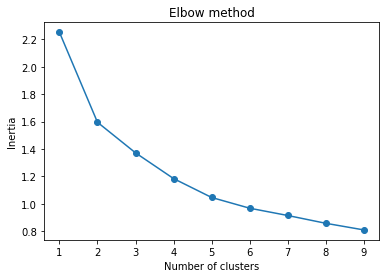

In [37]:
plot_inertia(kmeans, zillow_cluster_norm, range(1, 10))

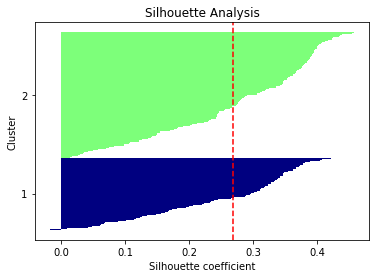

In [38]:
kmeans.set_params(n_clusters=2)
plot_silhouette(kmeans, zillow_cluster_norm)

In [49]:
from sklearn.cluster import AgglomerativeClustering
hier = AgglomerativeClustering()

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

def linkage_frame(data):
    row_clusters = linkage(data, method='complete', metric='euclidean')
    columns = ['row label 1', 'row label 2', 'distance', 'no. items in clust.']
    index = ['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])]
    linkage_df = pd.DataFrame(row_clusters, columns=columns, index=index)
    return linkage_df

In [55]:
linkage_df = linkage_frame(zillow_cluster_norm.values)
linkage_df.head()

,row label 1,row label 2,distance,no. items in clust.
cluster 1,0.0,291.0,0.0,2.0
cluster 2,1.0,292.0,0.0,2.0
cluster 3,2.0,293.0,0.0,2.0
cluster 4,3.0,294.0,0.0,2.0
cluster 5,4.0,295.0,0.0,2.0


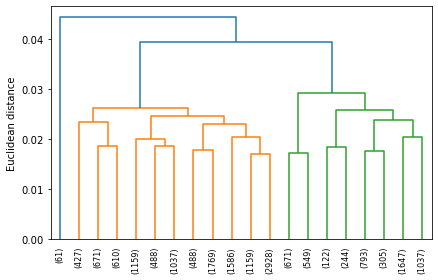

In [60]:
row_dendr = dendrogram(linkage_df, leaf_rotation=90, truncate_mode='lastp', p=20, leaf_font_size=8)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [62]:
hier.set_params(n_clusters=4)
hier.fit(zillow_cluster_norm)
label = hier.labels_

In [71]:
clusters = pd.DataFrame({'Clusters':hier.labels_})

In [74]:
zillow_new = pd.concat([zillow, clusters], axis=1)
zillow_new

,Zipcode,City,State,Metro,County,SizeRank,Date,Rent,Year,State-County,...,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college,Clusters
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2015-01-01,3566.0,2015,NY-New York County,...,1.153877,2.214388,0.932888,0.088021,0.066820,0.084888,0.051420,30.096886,0.216281,2
1,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2015-01-01,3413.0,2015,NY-New York County,...,1.231472,1.853056,0.955315,0.082397,0.044685,0.073276,0.039193,27.057535,0.262305,1
2,10002,New York,NY,New York-Newark-Jersey City,New York County,7,2015-01-01,3508.0,2015,NY-New York County,...,1.065116,2.235927,0.929920,0.168466,0.070080,0.051605,0.018042,30.594358,0.172389,2
3,11226,New York,NY,New York-Newark-Jersey City,Kings County,11,2015-01-01,1876.0,2015,NY-Kings County,...,1.097732,2.729889,0.928099,0.103083,0.071901,0.045075,0.010311,42.388151,0.127736,2
4,10467,New York,NY,New York-Newark-Jersey City,Bronx County,12,2015-01-01,1442.0,2015,NY-Bronx County,...,1.048949,2.824023,0.874915,0.129880,0.125085,0.093202,0.008001,43.596975,0.086000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17746,11416,New York,NY,New York-Newark-Jersey City,Queens County,1818,2020-01-01,2184.0,2020,NY-Queens County,...,1.076348,3.758487,0.926849,0.118820,0.073151,0.064774,0.016516,45.186076,0.105364,0
17747,11436,New York,NY,New York-Newark-Jersey City,Queens County,1820,2020-01-01,2057.0,2020,NY-Queens County,...,1.076510,3.597384,0.908314,0.064390,0.091686,0.053295,0.014245,46.974765,0.091597,0
17748,11366,New York,NY,New York-Newark-Jersey City,Queens County,1826,2020-01-01,2185.0,2020,NY-Queens County,...,1.085258,3.162098,0.915833,0.117797,0.084167,0.056246,0.006280,40.697500,0.187850,0
17749,11109,New York,NY,New York-Newark-Jersey City,New York County,1828,2020-01-01,3325.0,2020,NY-New York County,...,1.376439,2.024712,0.963464,0.034176,0.036536,0.136599,0.120883,28.097646,0.328373,1


In [77]:
zillow_new.to_csv('all_areas_clusters_hier.csv', index=False)